# Pib Lib Demo
### Reference Notebook for the functionality of pib lib
> To run this notebook, pib_lib must be installed in your Python environment.
> Observe that since the plotting functionality of this library is wrapped around matplotlib, some understanding of matplotlib might be required to further customize and save figures or animations produced with this library. When used for the production of figures or animations, it is recommended to run your code from a python file instead of using a notebook.
> The markdown version of this document serves as static reference for the library.

In [1]:
%config InlineBackend.figure_formats = ['svg']  # set 'svg' as default notebook figure fromat

In [2]:
from pib_lib import particle_in_a_box as pib    # Main library providing the <Particle_in_Box_State> class
from pib_lib import update_plot as up           # library to provide basic visualization functionality based on matplotlib
from pib_lib import Special_States as spst      # Collection of special preset states (Gaussian wave packets)
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Weird workaround to convince matplotlib to use white as background color
# for plots
plt.plot()
plt.rcParams["figure.facecolor"] = "white"
plt.close()

## Creation of States

Creation of a generic particle-in-a-box state $\lvert \psi(t) \rangle$ with the following parameters:
- `L`: Width of the interval in natural units
- `m`: Mass of the particle in natural units
- `states`: Array containing the quantum numbers of the energy eigenstates we want to superimpose. To understand which states the respective quantum numbers refer to, please see [Self-Adjoint Hamiltonian](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2).
- `amps`: Amplitudes of the latter states. If the resulting state is not normalized to one, the state will be normalized automatically; hence the entries of the list are to be considered relative amplitudes.
- `boundary_condition`: one of `symmetric`, `anti_symmetric`, `dirichlet`, `neumann`, `dirichlet_neumann`, `symmetric_nummeric`, `anti_symmetric_nummeric`.
Please see sections [2.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.2) and [2.3](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3) of the [bachelor thesis](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf) this library was designed for, and the introduction in [`README.md`](../README.md) to get a better understanding of the boundary conditions.
- `gamma`: Parameter characterizing the boundary condition of a self-adjoint Hamilton operator depending on choice of `boudary_condition` 
  - for `symmetric` and `symmetric_nummeric` : $\verb|gamma| = \gamma_+ = \gamma_-$ (see [section 2.3.1](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))
  - for `anti_symmetric` and `anti_symmeric_nummeric`: $\verb|gamma| = \gamma_+ = -\gamma_-$ (see [section 2.3.2](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.2.3))

In [4]:
L = 2*np.pi
m = 1
states = [1,2,3]
amps = [1,1j,1+1j]
boudary_condition = "anti_symmetric"
gamma = 10

state = pib.Particle_in_Box_State(boudary_condition, L, m, states, amps, gamma)

### The `Particle_in_Box_State` object 

After creation, most properties of the state can be altered as follows:

In [5]:
state.L = 2*np.pi                   # change length of the interval
state.m = 2                         # change mass of the particle
state.case = "dirichlet_neumann"    # change the boundary condition

state.add_state([4,5], [2, 3])      # add states with quantum numbers 4 and 5 and relative amplitudes of 2 and 3 respectively
state.remove_state([1,4])           # remove the previously added states with quantum numbers 1 and 4

We can then retrieve position and momentum space projections of the state $\langle x \vert \psi(t) \rangle$ and $\langle k \vert \psi(t) \rangle$, i.e. the projections onto the eigenfunctions of $\hat{x}=x$ and $\hat{p} = -i\partial_x$, as python functions:

In [6]:
pos_space_proj = state.x_space_wavefunction
momentum_space_proj = state.k_space_wavefunction

It is important to keep in mind, that these functions are only the projections onto the respective spaces but not the probability distributions.
The latter functions take as arguments a continuous value of position (that is, of momentum respectively) and the time:

In [7]:
x_amp = pos_space_proj(0.5, 1)      # evaluate the position space wave function at x = 0.5 and t = 1
k_amp = momentum_space_proj(10, 1)  # evaluate the momentum space wave function at k = 10 and t = 1

The library also implements the projection onto the eigenfunctions of the operator $\hat{p}_R = -i\sigma_{1}\partial_x$ for $\sigma_1$ being the Pauli-matrix $\left(\begin{smallmatrix} 0 & 1 \\ 1 & 0\end{smallmatrix} \right)$. This operator referred to as 'new momentum' acts on a Hilbert space of two component wave functions. Its theoretical importance consists of the fact that $\hat{p}_R$ is self-adjoint and thus may describe a physical observable. [Investigations](http://www.wiese.itp.unibe.ch/theses/herrmann_bachelor.pdf#chapter.4) have shown that $\hat{p}_R$ exhibits properties that one would assign to an operator describing the momentum of a particle. To better understand this operator, please consider the recommended readings found in [`README.md`](../README.md) such as [The New Momentum Concept](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#chapter.3). Unlike the spectrum of the operator $\hat{p}$, the spectrum of $\hat{p}_R$ is discrete; we denote its eigenstates with $\lvert k_n \rangle$ for $n\in \mathbb{Z}$ and with the corresponding momentum eigenvalues being $k_n = n\frac{\pi}{L}$. The projection $\langle k_n \vert \psi(t) \rangle$ can be retrieved by:

In [8]:
new_momentum_space_proj = state.new_k_space_wavefunction

Notice that the latter function is to be understood as $\verb|new_momentum_space_proj|(n, t) = \langle k_n \vert \psi(t) \rangle$, i.e. as a function in the discrete new momentum quantum number $n$ and the time $t$. Evaluation hence reads:

In [9]:
new_k_amp = new_momentum_space_proj(10, 1)

Besides the projections of the wave function, the state object lets the user also retrieve the expectation values of position and (new) momentum as functions of time, i.e. $\langle \hat{x} \rangle(t)$ and $\langle \hat{p}_R \rangle(t)$.

In [10]:
pos_exp_val = state.x_space_expectation_value
new_k_exp_val = state.new_k_space_expectation_value

Of theoretical interest as well is the time derivative of the position expectation value $\tfrac{d}{dt}\langle \hat{x} \rangle(t)$. Access to this quantity provides numerical means to verify the [Ehrenfest Theorem](http://www.wiese.itp.unibe.ch/theses/herrmann_bachelor.pdf#chapter.4) for the new momentum concept, i.e. the relation $$\langle \hat{p}_R \rangle = m \tfrac{d}{dt}\langle \hat{x} \rangle(t).$$

In [11]:
pos_exp_val_deriv = state.x_space_expectation_value_derivative

We will encounter all of these attributes again, when considering the plotting functionality of the library. The respective projections and expectation values are thereby used under the hood by the corresponding visualization objects.

### More Tools to Work with States

Among the attributes of the `Particle_in_Box_State` object, the user also has intended access to the `boundary_lib` which provides a collection of methods, specific to the boundary conditions of the Hamiltonian, that are used by the internals of the library but may also be used directly, e.g. for testing purposes. The following example shows how to manually approximate the expectation of the new momentum at $t=0$.

In [12]:
# We firts define the arange of momentum quantum numbers, we want to consider 
# for the nummerical approximation of the expectation value of p_R at t = 0
n_range = np.arange(-1000, 1000)

# We then use the boundary_lib object of our state to retrieve the momenta that
# corerspond to the quantum numbers defined above.
kn_range = state.boundary_lib.get_kn(n_range)

# Retrieve the absolute square of the amplitudes corresponding to the above
# defined quantum numbers of the new momentum space projection by using the 
# 'new_momentum_space_proj' variable we defined above
k_amps = np.abs(new_momentum_space_proj(n_range, 0))**2

# mutliply the momenta with the respective absolute squares of the projection
# coefficients and take the sum over the products
p_R_exp_val = np.sum(kn_range*k_amps)

# compare the result with the expectation value that we directly retireved from
# the state object
print("manually computed expectation value: {} \nautomatically computed expectation value: {}".format(p_R_exp_val, new_k_exp_val(0)))

manually computed expectation value: 0.3536776513153228 
automatically computed expectation value: 0.35367765131532314


Other methods provided by the `boundary_lib` include:
- `get_x_space_projection`: compute $\langle x \vert l \rangle$ as a function of position $x$ for $\rvert l \rangle$ being the energy eigenstate with quantum number $l$,
- `get_k_space_projection`: compute $\langle k \vert l \rangle$ as a function of momentum $k$,
- `get_new_k_space_projection`: compute $\langle n \vert l \rangle$ as a function of the discrete new momentum quantum number $n$,
- `get_x_matrix_element`: compute the matrix element $\langle l \vert \hat{x} \vert l' \rangle$ for $\lvert l \rangle$ and $\lvert l' \rangle$ being energy eigenstates,
- `get_pR_matrix_element`: compute the matrix element $\langle l \vert \hat{p}_R \vert l'\rangle$.

## Plotting States...

### ...with simple `Updatable_Plot` objects

To easily create plots of the above considered projections of the state $\lvert\psi(t)\rangle$, we can use simple `Updatable_Plot` objects; these include:
- Basic Plots of projections of $\lvert \psi(t) \rangle$
  - `Position_Space_Plot`
  - `Momentum_Space_Plot`
  - `New_Momentum_Space_Plot`
- Vertical Lines to indicate expectation values of $\hat{x}$ and $\hat{p}_R$
  - `Position_Expectation_Value`
  - `Momentum_Expectation_Value`
- Plots that show the respective expectation values as functions of $t$
  - `Position_Expectation_Value_Evolution`
  - `Momentum_Expectation_Value_Evolution`
  - `Pos_Exp_Deriv_Evolution`
- Plot elements to help indicate the time $t$ when animating expectation value plots
  - `Position_Expectation_Value_Marker`
  - `Momentum_Expectation_Value_Marker`
  - `Expectation_Value_Evolution_Time`

To illustrate the `Updatable_Plot` object, we only consider the example of `Position_Space_Plot` as all the above objects inherit form `Updatable_Plot` and thus behave similarly.

#### Creating a generic `Updatable_Plot` object

We illustrate the creation of an `Upadtable_Plot` object by considering $\lvert \langle x \vert \psi(t) \rangle \rvert^2$. That is, we consider the object `Position_Space_Plot`. The plot layout must first be defined by using matplotlib directly:

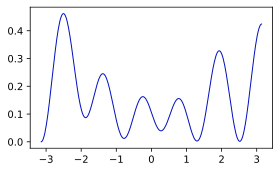

In [13]:
# Create figure using matplotlib
fig = plt.figure(tight_layout=True, figsize=(4,2.5))    

# Create position space plot showing the absolute square of the projection 
# onto position space. A matplotlib axis is automatically created.
# The class <Postion_Space_Plot> inherits form <Updatable_Plot>                        
position_plot = up.Position_Space_Plot(state, "abs_square", fig)    
# Create matplotlib lines and add them to the axis created above
lines = position_plot.plot()

#### Manipulating `Updatable_Plot` object

After creation, basic parameters of any `Updatable_Plot` object can be modified. These manipulations concern visual details such as line color or width but also physical parameters such as the time $t$. Other physical quantities that are directly related to the state $\lvert \psi(t) \rangle$ can be adjusted by manipulating the `Particle_in_Box_State` object. Further modifications concerning the matplotlib objects involved can be achieved by accessing the `Axes` or `Line2D` objects.

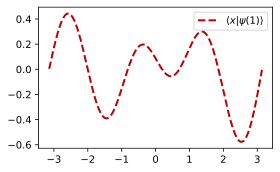

In [14]:
# Create figure
fig = plt.figure(tight_layout=True, figsize=(4,2.5))

# Create position space plot
position_plot = up.Position_Space_Plot(state, "abs_square", fig)

# Setting mode to 'real' in order to plot the real part of the projection onto 
# position space instead of the absolute square which the object was set to at 
# creation
position_plot.set_mode("real")

# Change line color, width and style
position_plot.plot_config(color=up.dark_red, linewidth=2, linestyle="--")

# Set time
position_plot.set_t(1)

# Manipulate the <Particle_in_Box_State>
# It is unlikely that you will need to manipulate the state after creation of 
# the plot object.
# Still, it is important to keep in mind that any modification of the state
# affects the plot object even after its creation.
state.case = "dirichlet"

# Plot the real part of the projection and return matplotlib <Line2D>
lines = position_plot.plot()

# Since the plotting method 'plot' returns a matplotlib object, any further 
# modifications of the plot concerning its appearance can be achieved by 
# manipulating the <Line2D> object. We may e.g. add a label to the line to 
# later include it in a legend.
lines.set_label(r"$\langle x \vert \psi(1) \rangle$")

# To e.g. include a legend in our plot, we need to access the matplotlib
# <Axes> object which has been created when constructing the 
# <Position_Space_Plot> object.
ax = position_plot.axis
legend = ax.legend()


#### Animating `Updatable_Plot`

Any `Updatable_Plot` objects supports animation of certain physical parameters. To create such animations, the library makes direct use of the `matplotlib.animation.FuncAnimation` object. If you want to get more information on the animation object we use here (e.g. to save the animation), please consider the documentation of [`matplotlib.animation.Animation`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation). The following snippet shows how to create an animation of the time evolution of the position distribution. The time is animated over the interval $[0, T]$ for $T$ being the [revival time](http://www.wiese.itp.unibe.ch/theses/wyss_bachelor.pdf#section.4.2) of the state, i.e. the time required for the wave function to obtain its initial shape again. Observe that this revival is guaranteed to occur for Dirichlet, Neumann and Dirichlet-Neumnann boundary conditions but not for general Robin boundary conditions. Hence, the function which returns the revival time for a given state will raise an error if the boundary conditions are incompatible. Notice that in this example, the result is saved to a `html` file.

In [ ]:
# Create figure
fig = plt.figure(tight_layout=True, figsize=(4,2.5))

# Create position space plot
position_plot = up.Position_Space_Plot(state, "abs_square", fig)

# Create animation of t over the interval [0, T] for T being the revival time. 
T = up.revival_time(state)
# Below, we create an animation with a duration of 20 sec and 20 fps
# Rendering such animations may take several minutes. 
anim = position_plot.anim("t", 0, T, 20, 20)
plt.close()
# Save the animation using the anim.save("animname.mp4") method of matplotlib.
# To get more information on animation objects such as the one created here, 
# please consider the documentation of matplotlib.animation.Animation objects.
# Below, the animation is written to a html file.
with open("simple_pos_densitiy_anim.html", "w") as f:
    f.write(anim.to_jshtml())

### ...with `Update_Plot_Collection` objects

Whenever your figure is to contain more than one subplot or if you intend to visualize e.g. real and imaginary part of the wave function in the same plot, the usage of the `Update_Plot_Collection` class is recommended. An `Update_Plot_Collection` object unites multiple `Updatable_Plot` objects, providing an interface to allow e.g. for the simultaneous animation of all its child objects. Since `Update_Plot_Collection` inherits from `Updatable_Plot`, it behaves similar to the objects encountered in the previous section.

#### Creating `Update_Plot_Collection`

To illustrate a simple use case of `Update_Plot_Collection`, we return to the previous example of the position space wave function. But instead of only visualizing the probability distribution, i.e. the absolute square of the wave function, we also show the real and imaginary part as well as the position expectation value $\langle \hat{x} \rangle$. The latter is visualized by a vertical line.

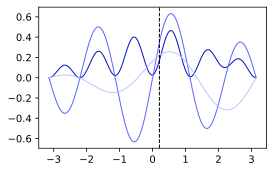

In [15]:
# Create figure using matplotlib 
fig = plt.figure(tight_layout=True, figsize=(4,2.5))

# Create matplotlib axis to contain the lines we create in the following.
# This was not necessary in the previous example, as we were only dealing with
# one axis which was created by the constructor of <Position_Space_Plot>.
ax = fig.add_subplot()

# Create position space plot showing the absolute square
pos_space_abs_square = up.Position_Space_Plot(state, "abs_square", fig, ax)

# Create position space plots showing the real and the imaginary part.
# Note that we can directly call the 'plot_config' method after construction
# as 'plot_config' returns the object it has been called by.
pos_space_real = up.Position_Space_Plot(state, "real", fig, ax).plot_config(color=up.mid_blue)
pos_space_imag = up.Position_Space_Plot(state, "imag", fig, ax).plot_config(color=up.light_blue)

# Create line to indicate the position expectation value
pos_space_expectation_value = up.Position_Expectation_Value(state, fig, ax)

# Unite the above crated objects into an <Update_Plot_Collection> to synchronize
# the creation of matplotlib lines with one single 'plot' command
pos_space_plot = up.Update_Plot_Collection(fig, pos_space_abs_square, pos_space_real, pos_space_imag, pos_space_expectation_value)

# Create matplotlib lines and add them to the axis created above.
# Notice that this is equivalent to calling the 'plot' method on all of the 
# objects created above.
lines = pos_space_plot.plot()

Instead of only working with one plot, we may define any matplotlib figure layout, fill it with `Updatable_Plot`'s and unite the latter plots in an `Update_Plot_Collection`.

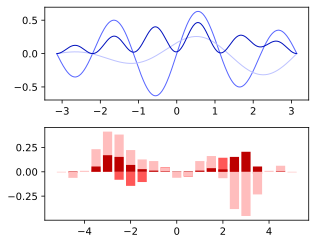

In [16]:
# Create figure and gridspec
fig = plt.figure(tight_layout=True, figsize=(4.5,3.5))
gs = fig.add_gridspec(nrows=2, ncols=1)

# Create an axis for a plot containing the position space projection,
# one for the new momentum space projections and one for the time evolution of 
# the respective expectation values.
position_ax = fig.add_subplot(gs[0,0])
momentum_ax = fig.add_subplot(gs[1,0])

# Create position space plots
pos_abs_sq = up.Position_Space_Plot(state, "abs_square", fig, position_ax)
pos_real = up.Position_Space_Plot(state, "real", fig, position_ax).plot_config(color=up.mid_blue)
pos_imag = up.Position_Space_Plot(state, "imag", fig, position_ax).plot_config(color=up.light_blue)

# Create new momentum space plots
new_k_abs_sq = up.New_Momentum_Space_Plot(state, "abs_square", fig, momentum_ax).plot_config(color=up.dark_red)
new_k_real = up.New_Momentum_Space_Plot(state, "real", fig, momentum_ax).plot_config(color=up.mid_red)
new_k_imag = up.New_Momentum_Space_Plot(state, "imag", fig, momentum_ax).plot_config(color=up.light_red)

# Unite objects...
collection = up.Update_Plot_Collection(fig, pos_real, pos_imag, pos_abs_sq, new_k_real, new_k_imag, new_k_abs_sq)

# Configure the momentum space plots to show the amplitudes for momentum 
# quantum numbers n = -10, ..., 10
collection.set_n_bound(10)

# ...and plot them all
lines = collection.plot()

We show some more customizations of `Update_Plot_Collection` objects in the 'template function' section below. We will thereby add some customization to the plots such as axis labels to assign some more meaning to the figure.

#### Animating `Update_Plot_Collection`

To animate an `Update_Plot_Collection` we proceed in the exact same manor as for simple `Updatable_Plot` objects. Again, the animation object is directly to a `html` file.

In [ ]:
anim = collection.anim("t", 0, T, 20, 20)
with open("simple_collection_anim.html", "w") as f:
    f.write(anim.to_jshtml())

### ...with template functions

To reduce the amount of code required to produce these plots, template functions may be used to provide a more straightforward interface. These functions always return `Update_Plot_Collection`'s. Keep in mind that since `Update_Plot_Collection` objects are themselves also `Updatable_Plot`'s, multiple `Update_Plot_Collection`'s can be united in an `Update_Plot_Collection`. We illustrate their usage by expanding the above example with a plot containing the expectation values of position and (new) momentum as function of time. Observe that the example below also demonstrates how to access `Updatatble_Plot` objects after they have been incorporated in an `Update_Plot_Collection`.

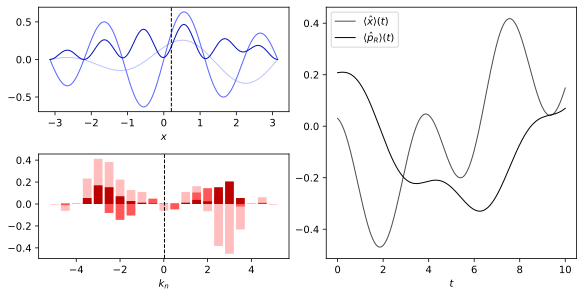

In [17]:
# Create figure and gridspec
fig = plt.figure(constrained_layout=True, figsize=(8, 4))
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create axes
position_ax = fig.add_subplot(gs[0,0])
momentum_ax = fig.add_subplot(gs[1,0])
expectation_ax = fig.add_subplot(gs[:,1])

# Use matplotlib to add axis labels
position_ax.set_xlabel("$x$")
momentum_ax.set_xlabel("$k_n$")
expectation_ax.set_xlabel("$t$")

# Create a plot collection that unites <Position_Space_Plot> objects that
# are used to plot the abs. square, the real and the imaginary part of the pos.
# space projection of the wavefunction. The collection also includes a plot
# that indicates the position expectation value.
pos_space_plots = up.position_space_plot(state, fig, position_ax, abs_square=True, real_part=True, imag_part=True, expectation_value=True)

# The separate plots the latter collection is made of can be accessed using a
# string as identifier. To change the colors of the lines representing real and
# imaginary part, we can proceed as follows:
pos_space_plots["real_part"].plot_config(color=up.mid_blue)
pos_space_plots["imag_part"].plot_config(color=up.light_blue)

# Create the same momentum space plots as in the example above
new_k_space_plots = up.new_momentum_space_plot(state, fig, momentum_ax, abs_square=True, real_part=True, imag_part=True, expectation_value=True)
new_k_space_plots["abs_square"].plot_config(color=up.dark_red)
new_k_space_plots["real_part"].plot_config(color=up.mid_red)
new_k_space_plots["imag_part"].plot_config(color=up.light_red)

# Create plots that show the evolution of the expectation values of position
# and new momentum as functions of time
expectation_value_plots = up.expectation_value_evolution(state, fig, expectation_ax, position_expectation_value=True, momentum_expectation_value=True)

# Unite the collections and set the range of momenta we consider in the plot
collection = up.Update_Plot_Collection(fig, pos_space_plots, new_k_space_plots, expectation_value_plots)
collection.set_n_bound(10)

# Create plots of the desired objects
lines = collection.plot()

# Access the matplotlib lines of the plot to set labels for the expectation
# value lines. With 'lines[2]' we get access to the lines of 
# 'expectation_value_plots'. 
lines[2][0].set_label(r"$\langle \hat{x} \rangle(t)$")
lines[2][1].set_label(r"$\langle \hat{p}_R \rangle(t)$")
legend = expectation_ax.legend()

To conclude this section, we create an animated version of the latter plot. We thereby also include three more plot objects that indicate the time of the animation in the expectation evolution figure. 

In [ ]:
# Create marker, to indicate the position and new momentum expectation value
# at a specific point of time in the expectation value evolution plot
pos_marker = up.Position_Expectation_Value_Marker(state, fig, expectation_ax)
new_k_marker = up.Momentum_Expectation_Value_Marker(state, fig, expectation_ax)

# Create vertical line to indicate the time of the animation in the expectation
# value plot
t_marker = up.Expectation_Value_Evolution_Time(state, fig, expectation_ax)

# Unite these plot elements
time_markers = up.Update_Plot_Collection(fig, pos_marker, new_k_marker, t_marker)

# Use the interface of the <Update_Plot_Collection> object to append the above
# defined objects to the collection
collection.add_plot(time_markers)

# Render the animation to an html file
anim = collection.anim("t", 0, 10, 20, 5)
with open("sophisticated_collection_anim.html", "w") as f:
    f.write(anim.to_jshtml())

## Special States (Gaussian shaped wave packages)

In this final section, we have a quick look at Gaussian shaped wave packages which can be created using the `Special_States` module. The hereby used `Bouncing_Gaussian` object inherits from the basic `Particle_in_Box_State` object but comes with a custom `__init__` method to create the state. The arguments required to construct a Gaussian state are therefore similar to those of any generic state. Instead of specifying which energy states we want to superimpose, we much rather specify the momentum $k_0$ and the 'sharpness' $a$ of the Gaussian. The Fourier space representation of the wave function we want to approximate hereby reads $$\tilde{\psi}(k) = (2a\sqrt{\pi})^{1/2} \exp{\left( -\frac{a^2}{2}(k-k_0)^2 \right)}. $$
Given the arguments `l_0`, `l_range` and `a` of the constructor of `Bouncing_Gaussian`, the latter wave function is then approximated as follows: 

We first convert the parameter `l_0` to a momentum $k_0$:
- for Neumann boundary conditions: $k_0 = \verb|l_0|\tfrac{\pi}{L}$,
- for Dirichlet boundary conditions: $k_0 = (\verb|l_0|+1)\tfrac{\pi}{L}$,
- for Dirichlet-Neumann boundary conditions: $k_0 = \tfrac{2\verb|l_0|+1}{2}\cdot \tfrac{\pi}{L}$,

the momentum space wave function from above is then projected onto the energy eigenstates within the range $[\verb|l_0-l_range|, \verb|l_0+l_range|]$. Given the coefficients of the latter projection, the internals of the `Particle_in_Box` object are then used to superimpose the states of the latter range.

In [18]:
gaussian = spst.Bouncing_Gaussian("dirichlet_neumann", L, m, 50, 30, 1)

The created object behaves identical to any state object; we therefore do not further consider its methods but instead conclude this section with a plot of the above constructed Gaussian.

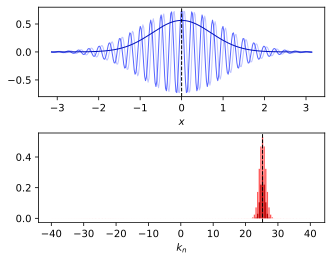

In [19]:
# Create figure and gridspec
fig = plt.figure(constrained_layout=True, figsize=(4.5, 3.5))
gs = fig.add_gridspec(nrows=2, ncols=1)

# Create axes
position_ax = fig.add_subplot(gs[0,0])
momentum_ax = fig.add_subplot(gs[1,0])

# Use matplotlib to add axis labels
position_ax.set_xlabel("$x$")
momentum_ax.set_xlabel("$k_n$")

# Create a plot collection that unites <Position_Space_Plot> objects that
# are used to plot the abs. square, the real and the imaginary part of the pos.
# space projection of the wavefunction. The collection also includes a plot
# that indicates the position expectation value.
pos_space_plots = up.position_space_plot(gaussian, fig, position_ax, abs_square=True, real_part=True, imag_part=True, expectation_value=True)

# The separate plots the latter collection is made of can be accessed using a
# sting as identifier. To change the colors of the lines representing real and
# imaginary part, we can proceed as follows
pos_space_plots["real_part"].plot_config(color=up.mid_blue)
pos_space_plots["imag_part"].plot_config(color=up.light_blue)

# Create the same momentum space plots as in the example above
new_k_space_plots = up.new_momentum_space_plot(gaussian, fig, momentum_ax, abs_square=True, real_part=True, imag_part=True, expectation_value=True)
new_k_space_plots["abs_square"].plot_config(color=up.dark_red)
new_k_space_plots["real_part"].plot_config(color=up.mid_red)
new_k_space_plots["imag_part"].plot_config(color=up.light_red)

collection = up.Update_Plot_Collection(fig, pos_space_plots, new_k_space_plots)
collection.set_n_bound(80)

lines = collection.plot()